In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm



Combining the data

In [2]:
csv = [pd.read_csv(f"./data/N_{str(i).zfill(2)}_extent_v3.0.csv") for i in range(1, 13)]
ice = pd.concat(csv, axis=0, ignore_index=True)
columns = ice.columns
name = [col.strip() for col in columns]
ice.columns = name
ice['extent'] = np.where(abs(ice['extent']) > 20 , np.nan, ice['extent'])
ice['area'] = np.where(abs(ice['area']) > 20, np.nan, ice['area'])
ice.interpolate(inplace=True)


C:\Users\LLR User\AppData\Local\Temp\ipykernel_18096\2476342085.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ice.interpolate(inplace=True)


In [3]:
ice.describe()

,year,mo,extent,area
count,541.000000,541.000000,541.000000,541.000000
mean,2000.874307,6.508318,11.354464,9.255832
std,13.027425,3.457470,3.270138,3.255909
min,1978.000000,1.000000,3.570000,2.410000
25%,1990.000000,4.000000,8.540000,6.190000
50%,2001.000000,7.000000,12.040000,9.950000
75%,2012.000000,10.000000,14.290000,12.290000
max,2023.000000,12.000000,16.340000,13.900000


Yearly Data

In [4]:

yearly_mean = ice.groupby('year')[['extent']].mean().reset_index()

In [5]:
from sklearn.model_selection import train_test_split
x = yearly_mean[['year']]
y=yearly_mean[['extent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,shuffle = False)

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

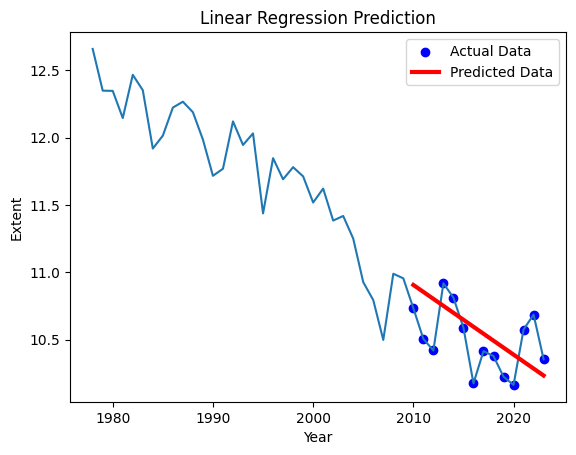

Mean Squared Error: 0.06277197923135061


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

from sklearn.metrics import mean_squared_error

plt.plot(x,y)

y_pred = model.predict(x_test)

# Plot the original data and the predicted values
plt.scatter(x_test, y_test, color='blue', label='Actual Data')
plt.plot(x_test, y_pred, color='red', linewidth=3, label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Fitting with entire data

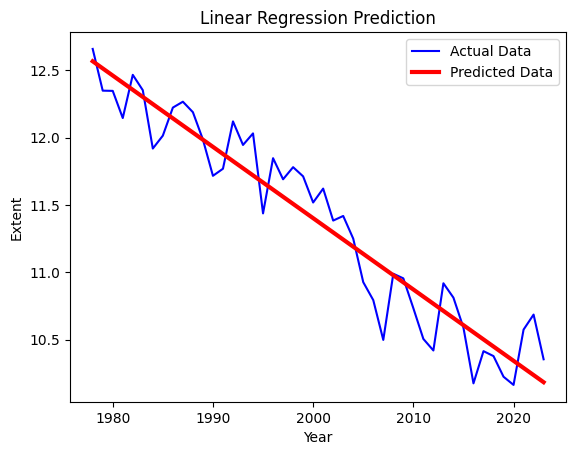

Mean Squared Error: 0.04893102907091636
Mean Absolute Error: 0.1891153278552319
R2 Score: 0.9099814651742528
Adjusted R2 Score: 0.9079355893827585


In [7]:
from sklearn.metrics import mean_absolute_error, r2_score
# Fit the model
model.fit(x, y)

# Predict the values
y_pred = model.predict(x)

# Plot the original data and the predicted values
plt.plot(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', linewidth=3, label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Error
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R2 Score
r2 = r2_score(y, y_pred)
print(f'R2 Score: {r2}')

# Calculate Adjusted R2 Score
n = len(x)
p = 1  # Number of predictors (in this case, only 'year')
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R2 Score: {adjusted_r2}')


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {
    'kernel': ['poly', 'rbf'],
    'degree': [2, 3, 4],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create the SVR model
model = SVR()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Make predictions on the testing data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the KNN regressor
knn = KNeighborsRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best estimator
best_model = grid_search.best_estimator_





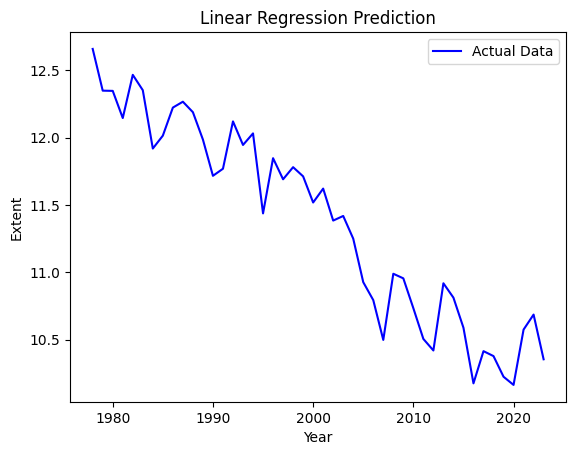

In [9]:
best_model.fit(x, y)

# Make predictions
y_pred = best_model.predict(x)

# Plot the original data and the predicted values
plt.plot(x, y, color='blue', label='Actual Data')
#plt.plot(x, y_pred, color='red', linewidth=3, label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()



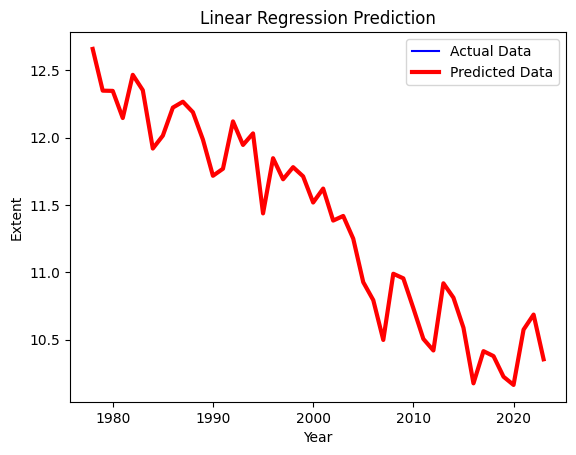

In [10]:
best_model.fit(x, y)

# Predict the values
y_pred = best_model.predict(x)

# Plot the original data and the predicted values
plt.plot(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', linewidth=3, label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()

In [16]:
import numpy as np

start_year = 2024
end_year = start_year + 20

new_years = np.arange(start_year, end_year + 1, 1)


c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


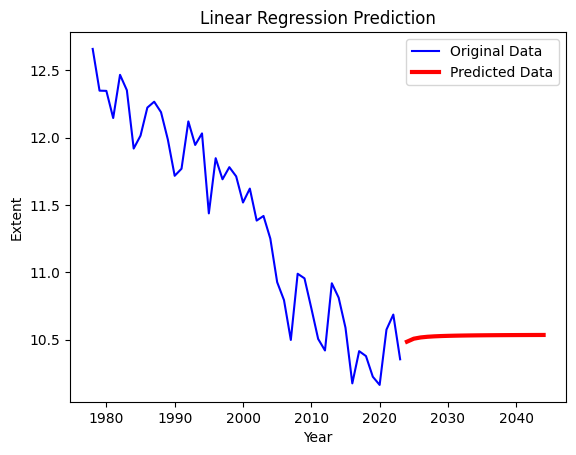

In [17]:
# Assuming 'best_model' is the best model obtained from the previous cells
pred = best_model.predict(new_years.reshape(-1, 1))

# Plot the original data and the predicted values
plt.plot(x, y, color='blue', label='Original Data')
plt.plot(new_years, pred, color='red', linewidth=3, label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()


Monthly data

In [9]:
monthly_data = ice.groupby(['year', 'mo'])['extent'].mean().reset_index()
monthly_data['date'] = pd.to_datetime(monthly_data.assign(day=1, month=monthly_data['mo'])[['year', 'month', 'day']])
monthly_data.drop(['year', 'mo'], axis=1, inplace=True)
monthly_data.head()

,extent,date
0,11.65,1978-11-01
1,13.67,1978-12-01
2,15.41,1979-01-01
3,16.18,1979-02-01
4,16.34,1979-03-01


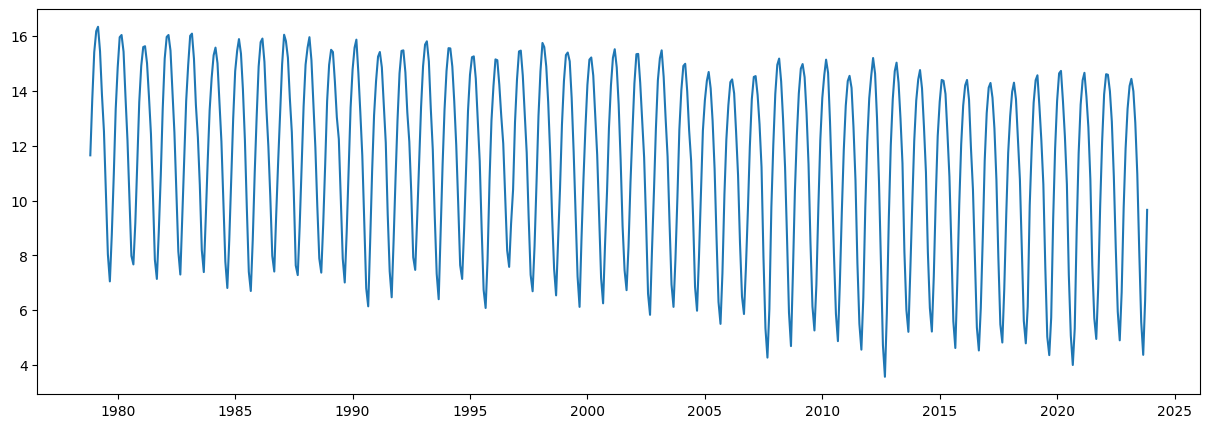

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_data['date'], monthly_data['extent'])


We could see the seasonal pattern and also,overall there is a declining trend with volatility clusters here and there.Therefore, we see the time series has varying mean and variance. Meaning, it is not stationary 

In [14]:
temp_data = monthly_data.set_index('date')

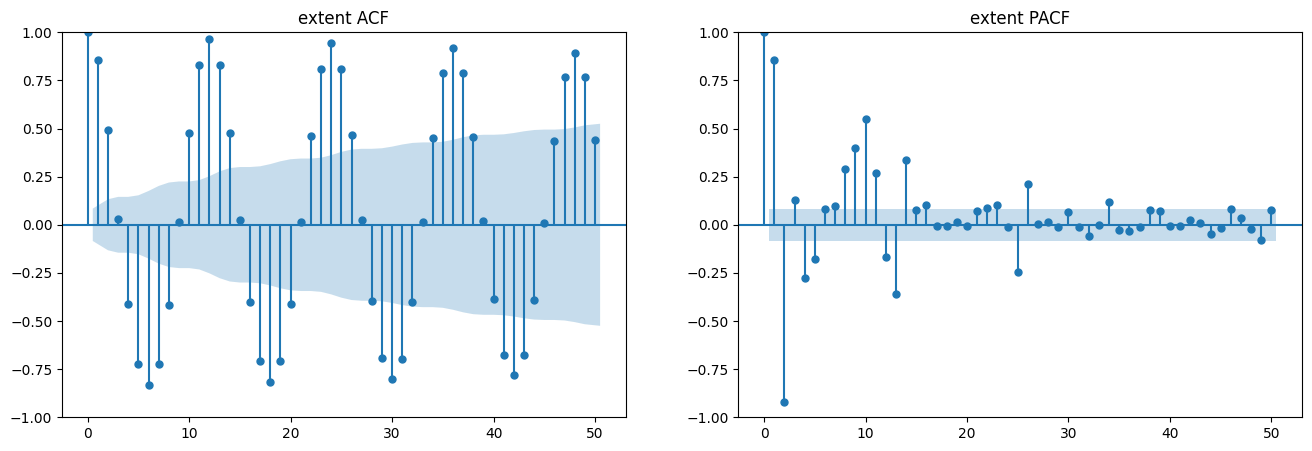

In [15]:


# plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(temp_data, title="extent ACF", lags=50, ax=ax1)
sm.graphics.tsa.plot_pacf(temp_data, title="extent PACF", lags=50, ax=ax2)
plt.show()


Since the series is seasonal and non-stationary, we will use differencing to make it stationary before applying SARIMA model

We will first do a seasonal differencing! Since, there is a recurrent pattern after every 12 lags, we take a differencing of 12.

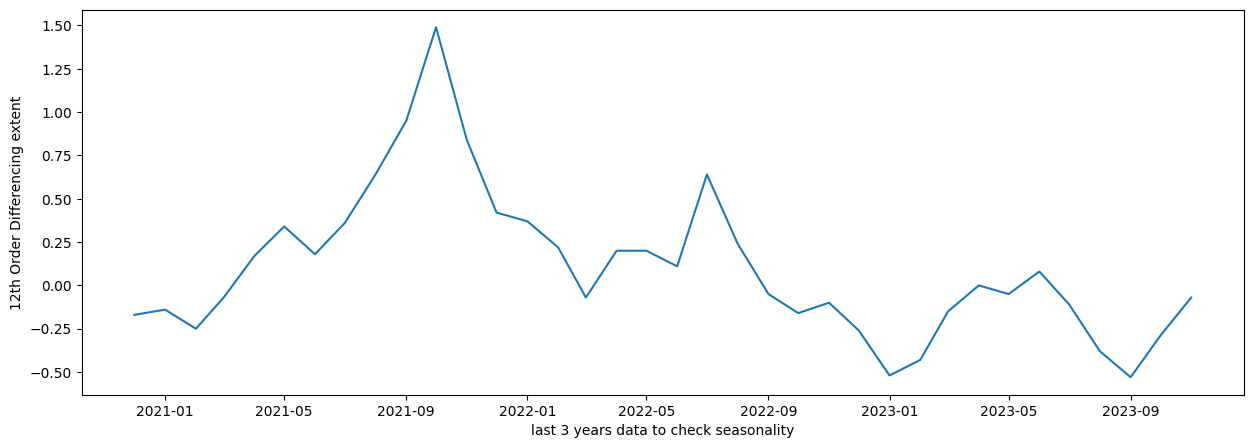

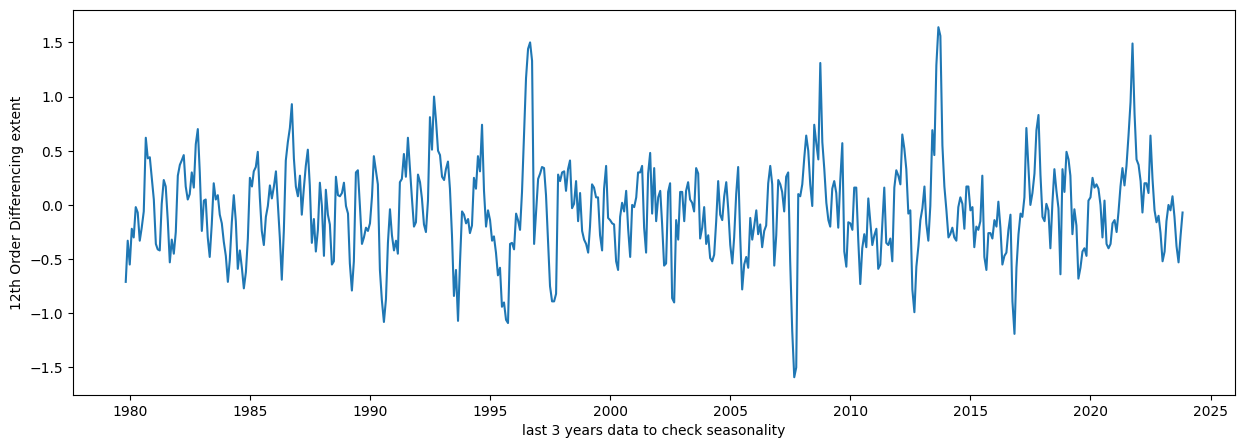

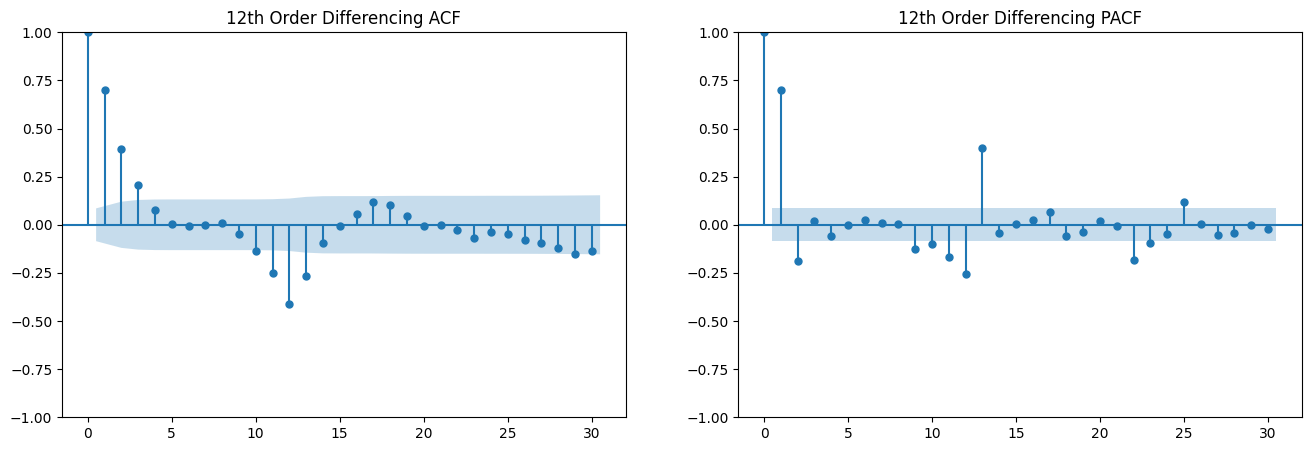

In [20]:
differenced_data = temp_data.diff(12).dropna()

plt.figure(figsize=(15, 5))
plt.plot(differenced_data[-36:])
plt.xlabel("last 3 years data to check seasonality")
plt.ylabel("12th Order Differencing extent")

plt.figure(figsize=(15, 5))
plt.plot(differenced_data)
plt.xlabel("last 3 years data to check seasonality")
plt.ylabel("12th Order Differencing extent")

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(differenced_data, title="12th Order Differencing ACF", lags=30, ax=ax1)
sm.graphics.tsa.plot_pacf(differenced_data, title="12th Order Differencing PACF", lags=30, ax=ax2)
plt.show()

We can clearly see from the above plots that we removed the effect of seasoning. But, still the series doesn't look stationary. This is because of the fact that there was a clear trend of our original data. We will do another differencing and make it stationary. 

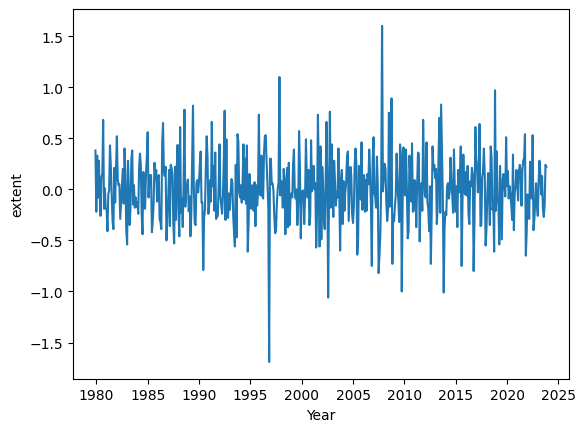

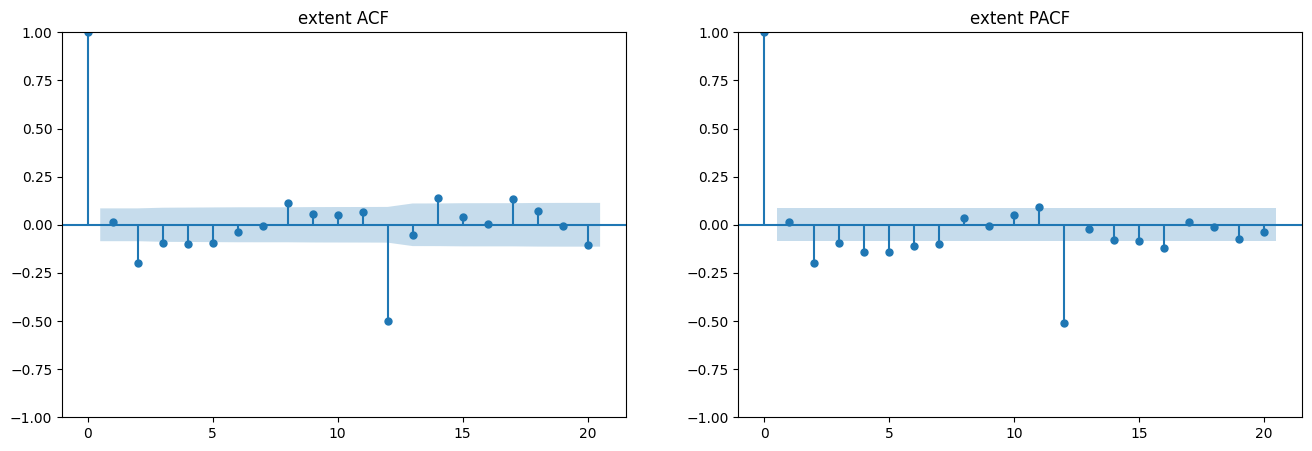

In [21]:
stationary_series = differenced_data.diff().dropna()
plt.plot(stationary_series)
plt.xlabel("Year")
plt.ylabel("extent")
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(stationary_series, title="extent ACF", lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(stationary_series, title="extent PACF", lags=20, ax=ax2)
plt.show()

We will perform a logged transformed to get better acf and pacf

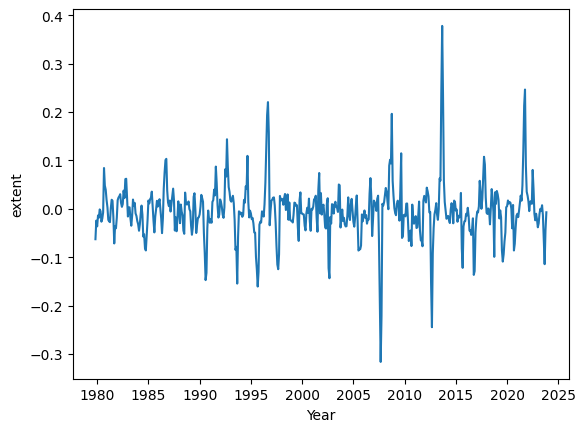

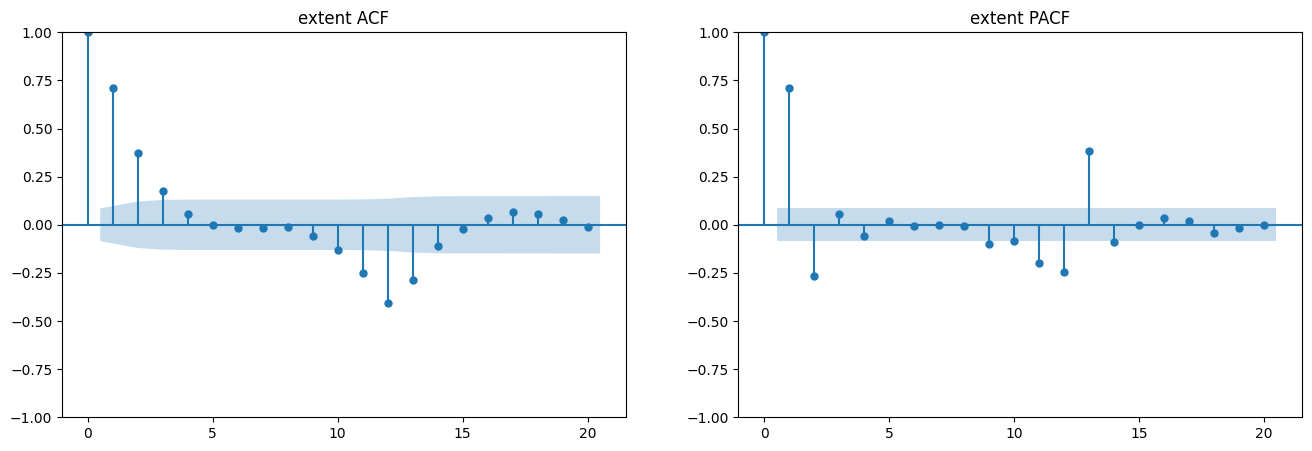

In [25]:
log_seasonal_series = np.log(temp_data).diff(12).dropna()
plt.plot(log_seasonal_series)
plt.xlabel("Year")
plt.ylabel("extent")
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(log_seasonal_series, title="extent ACF", lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(log_seasonal_series, title="extent PACF", lags=20, ax=ax2)
plt.show()

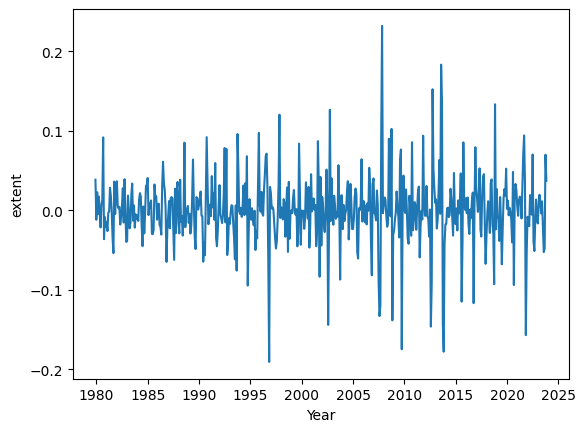

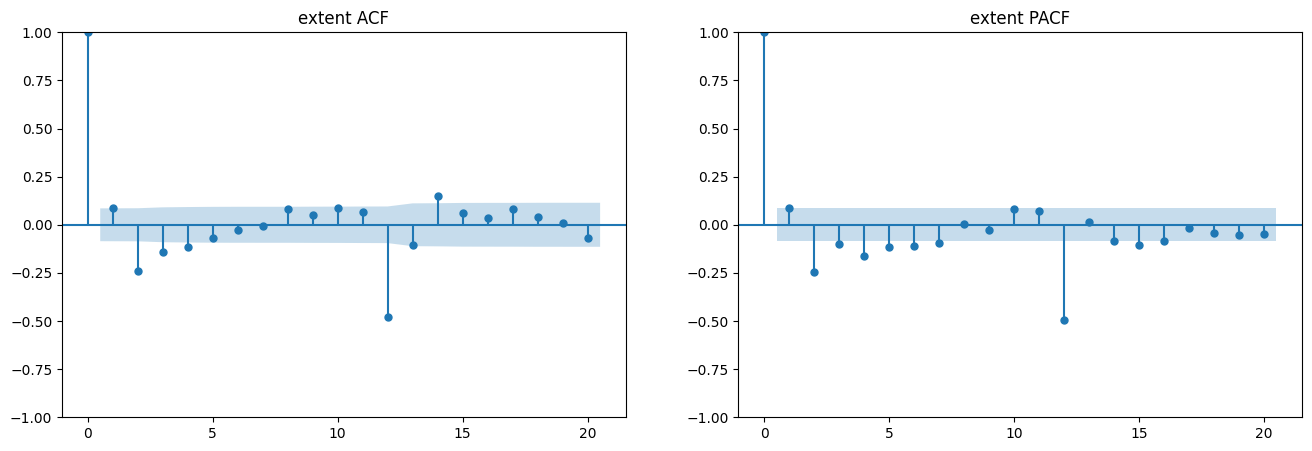

In [26]:
log_stationary_series = log_seasonal_series.diff().dropna()
plt.plot(log_stationary_series)
plt.xlabel("Year")
plt.ylabel("extent")
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(log_stationary_series, title="extent ACF", lags=20, ax=ax1)
sm.graphics.tsa.plot_pacf(log_stationary_series, title="extent PACF", lags=20, ax=ax2)
plt.show()

From ACF, we can see that there is seasonality at lag 12, indicating that seasons occure after 12 points. 




In [32]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs
from pmdarima.arima.utils import nsdiffs

diff_trend = ndiffs(temp_data)
diff_season = nsdiffs(temp_data,m=12)

print(diff_trend)
print(diff_season)

1
1


c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\LLR User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


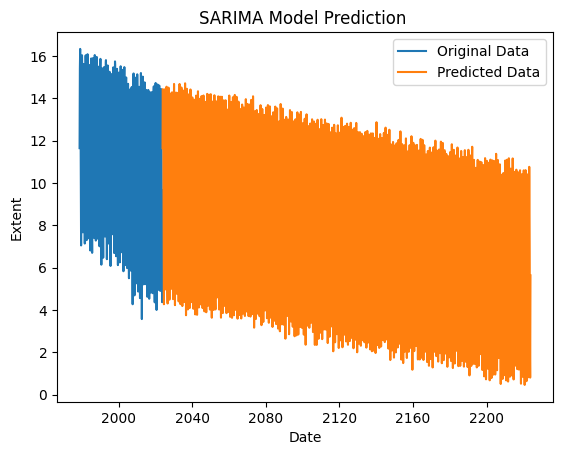

In [71]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'temp_data' is your time series data

# Fit the SARIMA model
model = sm.tsa.SARIMAX(temp_data, order=(3, 1, 3), seasonal_order=(2, 1, 2, 12))
model_fit = model.fit()

# Predict for the next 20 time steps
forecast = model_fit.get_forecast(steps=2400)

# Get the predicted values
predicted_values = forecast.predicted_mean

# Add random noise
np.random.seed(123)  # for reproducibility
noise = np.random.normal(0, 0.3, len(predicted_values))
predicted_values= predicted_values + noise

# Plot the original data, predicted data, and predicted data with noise
plt.plot(temp_data.index, temp_data.values, label='Original Data')
plt.plot(predicted_values.index, predicted_values, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Extent')
plt.title('SARIMA Model Prediction ')
plt.legend()
plt.show()


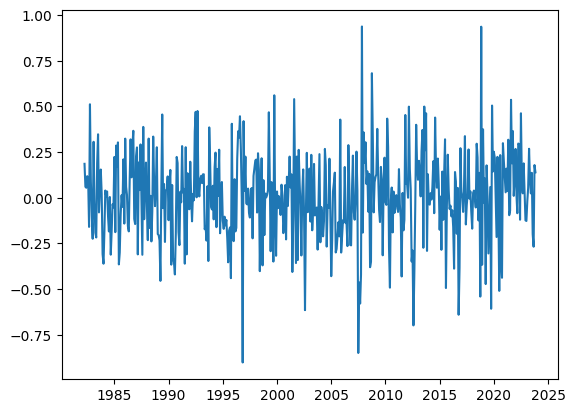

In [58]:
residuals = model_fit.resid 

residuals = residuals[-500:]
plt.plot(residuals)

Multiple linear regression 


In [72]:
temp = pd.read_csv('./data/land_ocean_temperature.csv')
carbon = pd.read_csv('./data/monthly_co2.csv')

In [73]:
temp.rename(columns={'Lowness (5)': 'low'}, inplace=True)

In [74]:
carbon['date'] = pd.to_datetime(carbon.assign(day=1, month=carbon['month'])[['year', 'month', 'day']])
carbon.set_index('date', inplace=True)
carbon = carbon[['monthly_average']]
monthly_data.set_index('date', inplace=True)
monthly_data.head()


,extent
date,
1978-11-01,11.65
1978-12-01,13.67
1979-01-01,15.41
1979-02-01,16.18
1979-03-01,16.34


In [75]:
data = pd.concat([monthly_data, carbon], axis=1, join='inner')
data = pd.DataFrame(data)
data.head()

In [76]:
data.shape

(541, 2)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression


a,b = 1,2

temp = 25


'''
Add any other variables which you think might be useful and find the coefficients
'''
y = a*data['monthly_average'] + b*data['temperature'] + np.random.normal(scale=0.1, size=data.shape[0])

df = pd.DataFrame(data)

model = LinearRegression()
X = df[['monthly_average', 'temperature']]
y = df['extent']
model.fit(X, y)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
